# MPG Prediction

In [1]:
import pandas as pd
import torch

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [4]:
def region(i):
    if i == 1:
        return "USA"
    elif i == 2:
        return "Europe"
    elif i == 3:
        return "Asia"

df["origin"] = df["origin"].transform(region)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,USA,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,USA,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,USA,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,USA,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,USA,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,USA,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,Europe,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,USA,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,USA,28.0


In [5]:
df = df.dropna().reset_index(drop=True)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,USA,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,USA,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,USA,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,USA,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,USA,17.0
...,...,...,...,...,...,...,...,...,...
387,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,USA,27.0
388,"vw,pickup",4,97.0,52.0,2130,24.6,82,Europe,44.0
389,"dodge,rampage",4,135.0,84.0,2295,11.6,82,USA,32.0
390,"ford,ranger",4,120.0,79.0,2625,18.6,82,USA,28.0


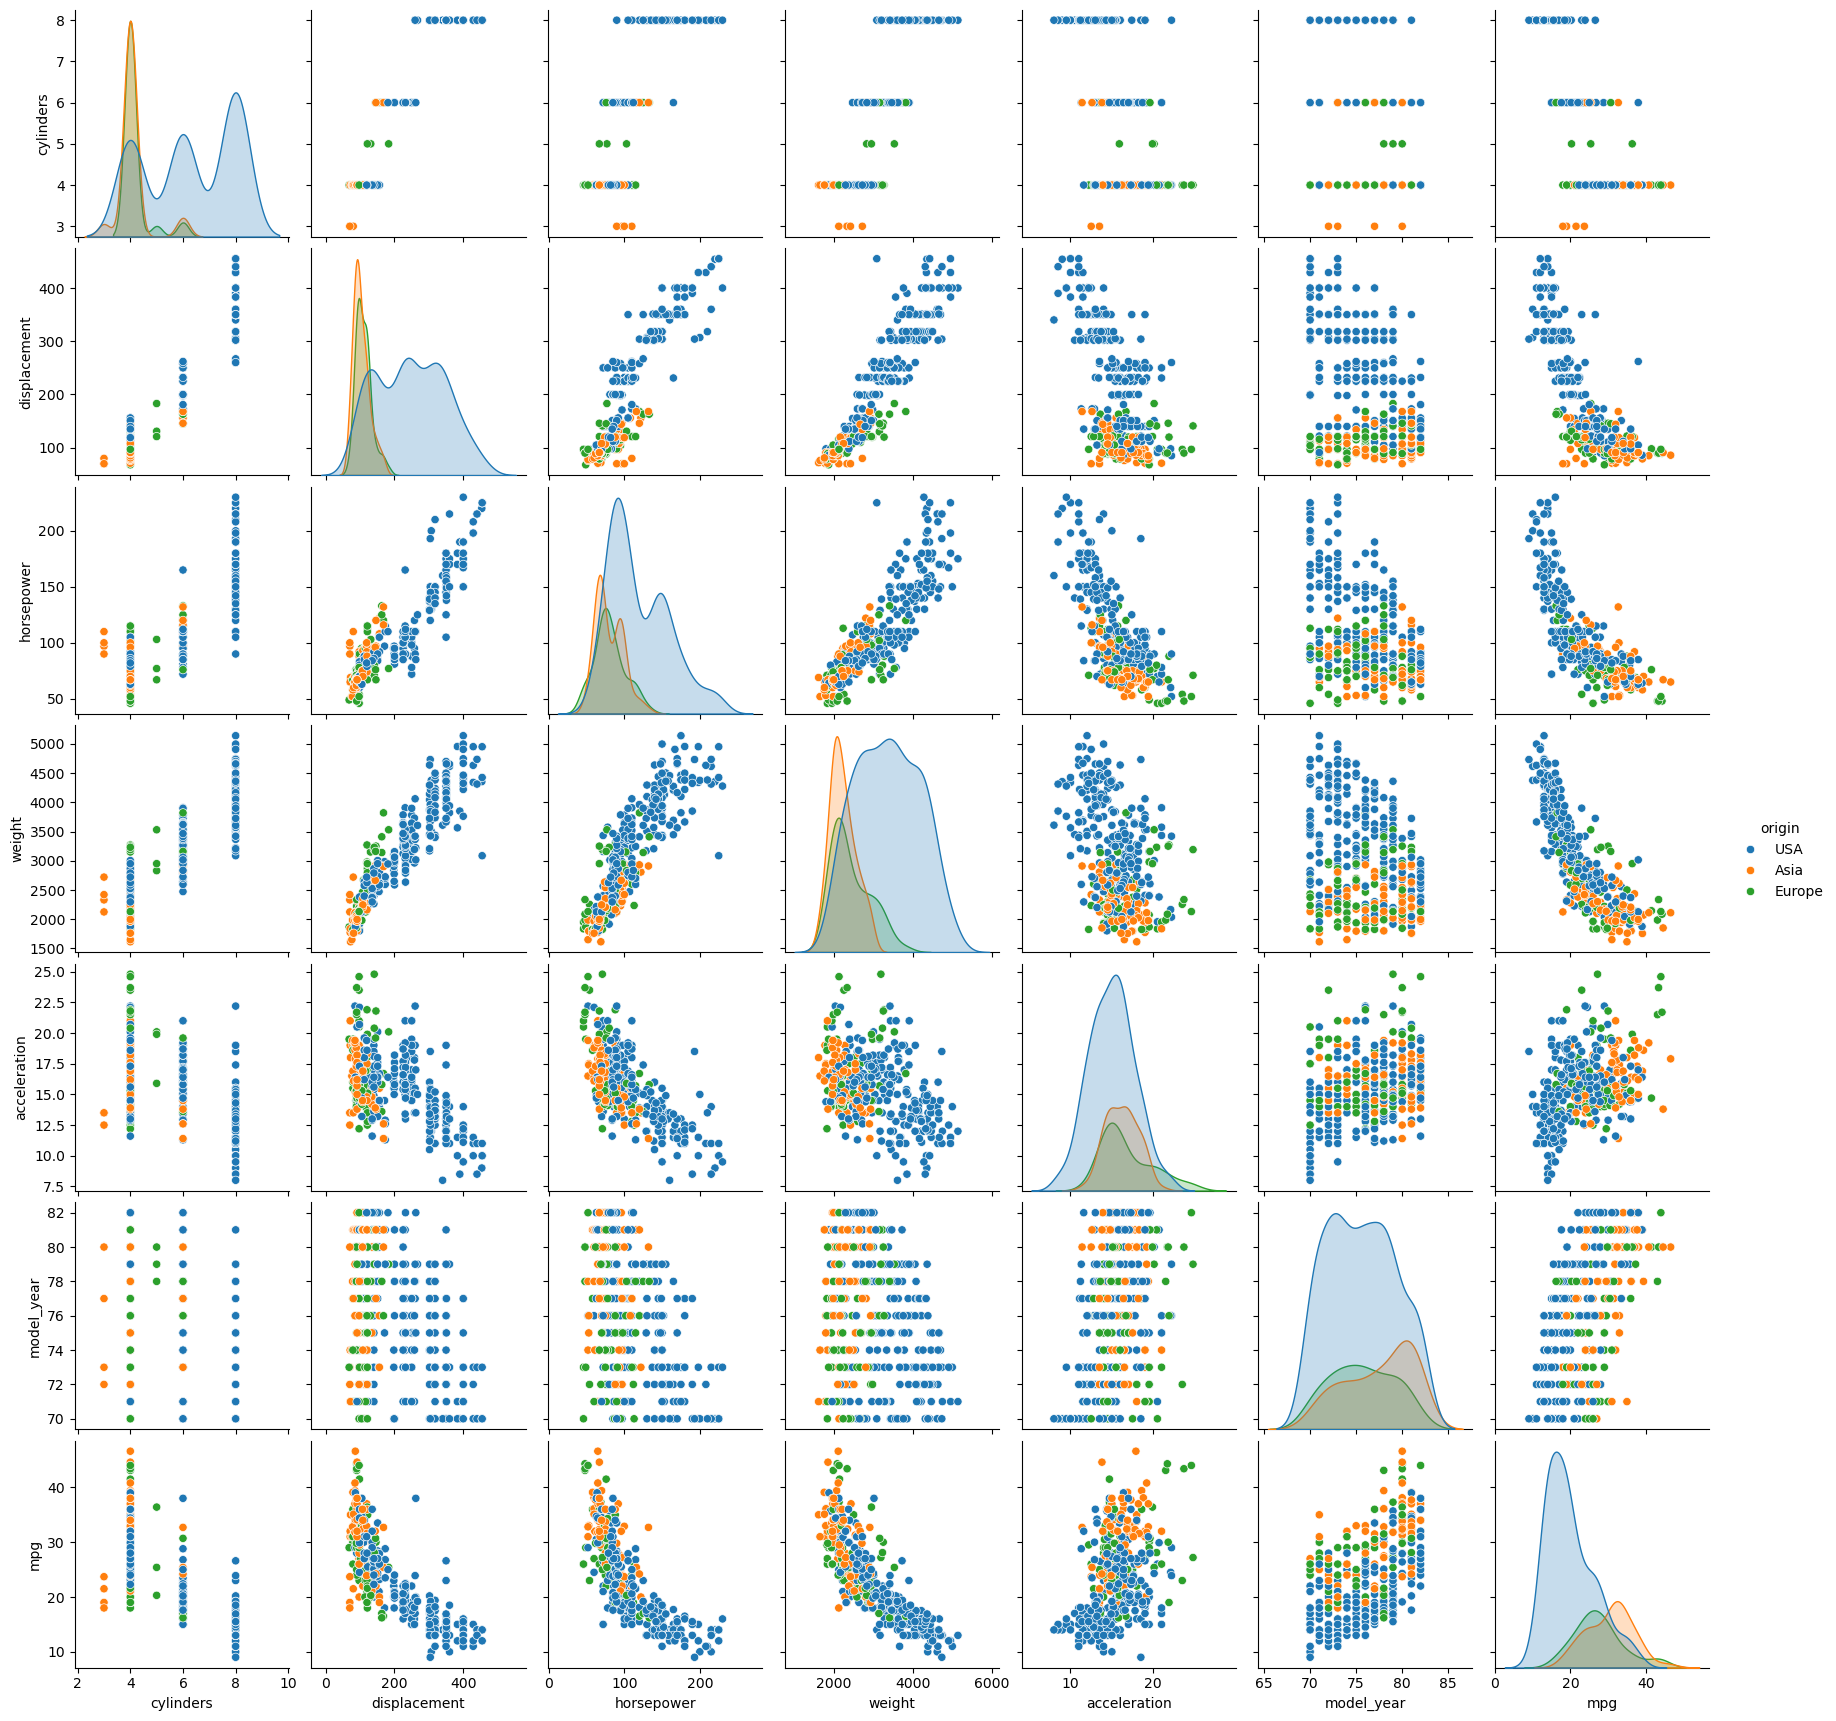

In [6]:
import seaborn as sns
sns.pairplot(df, hue="origin")

In [7]:
torch.tensor(df["mpg"])

tensor([18.0000, 15.0000, 18.0000, 16.0000, 17.0000, 15.0000, 14.0000, 14.0000,
        14.0000, 15.0000, 15.0000, 14.0000, 15.0000, 14.0000, 24.0000, 22.0000,
        18.0000, 21.0000, 27.0000, 26.0000, 25.0000, 24.0000, 25.0000, 26.0000,
        21.0000, 10.0000, 10.0000, 11.0000,  9.0000, 27.0000, 28.0000, 25.0000,
        19.0000, 16.0000, 17.0000, 19.0000, 18.0000, 14.0000, 14.0000, 14.0000,
        14.0000, 12.0000, 13.0000, 13.0000, 18.0000, 22.0000, 19.0000, 18.0000,
        23.0000, 28.0000, 30.0000, 30.0000, 31.0000, 35.0000, 27.0000, 26.0000,
        24.0000, 25.0000, 23.0000, 20.0000, 21.0000, 13.0000, 14.0000, 15.0000,
        14.0000, 17.0000, 11.0000, 13.0000, 12.0000, 13.0000, 19.0000, 15.0000,
        13.0000, 13.0000, 14.0000, 18.0000, 22.0000, 21.0000, 26.0000, 22.0000,
        28.0000, 23.0000, 28.0000, 27.0000, 13.0000, 14.0000, 13.0000, 14.0000,
        15.0000, 12.0000, 13.0000, 13.0000, 14.0000, 13.0000, 12.0000, 13.0000,
        18.0000, 16.0000, 18.0000, 18.00

In [89]:
df_USA = df[df["origin"] == "USA"]
df_EUA = df[df["origin"] != "USA"]

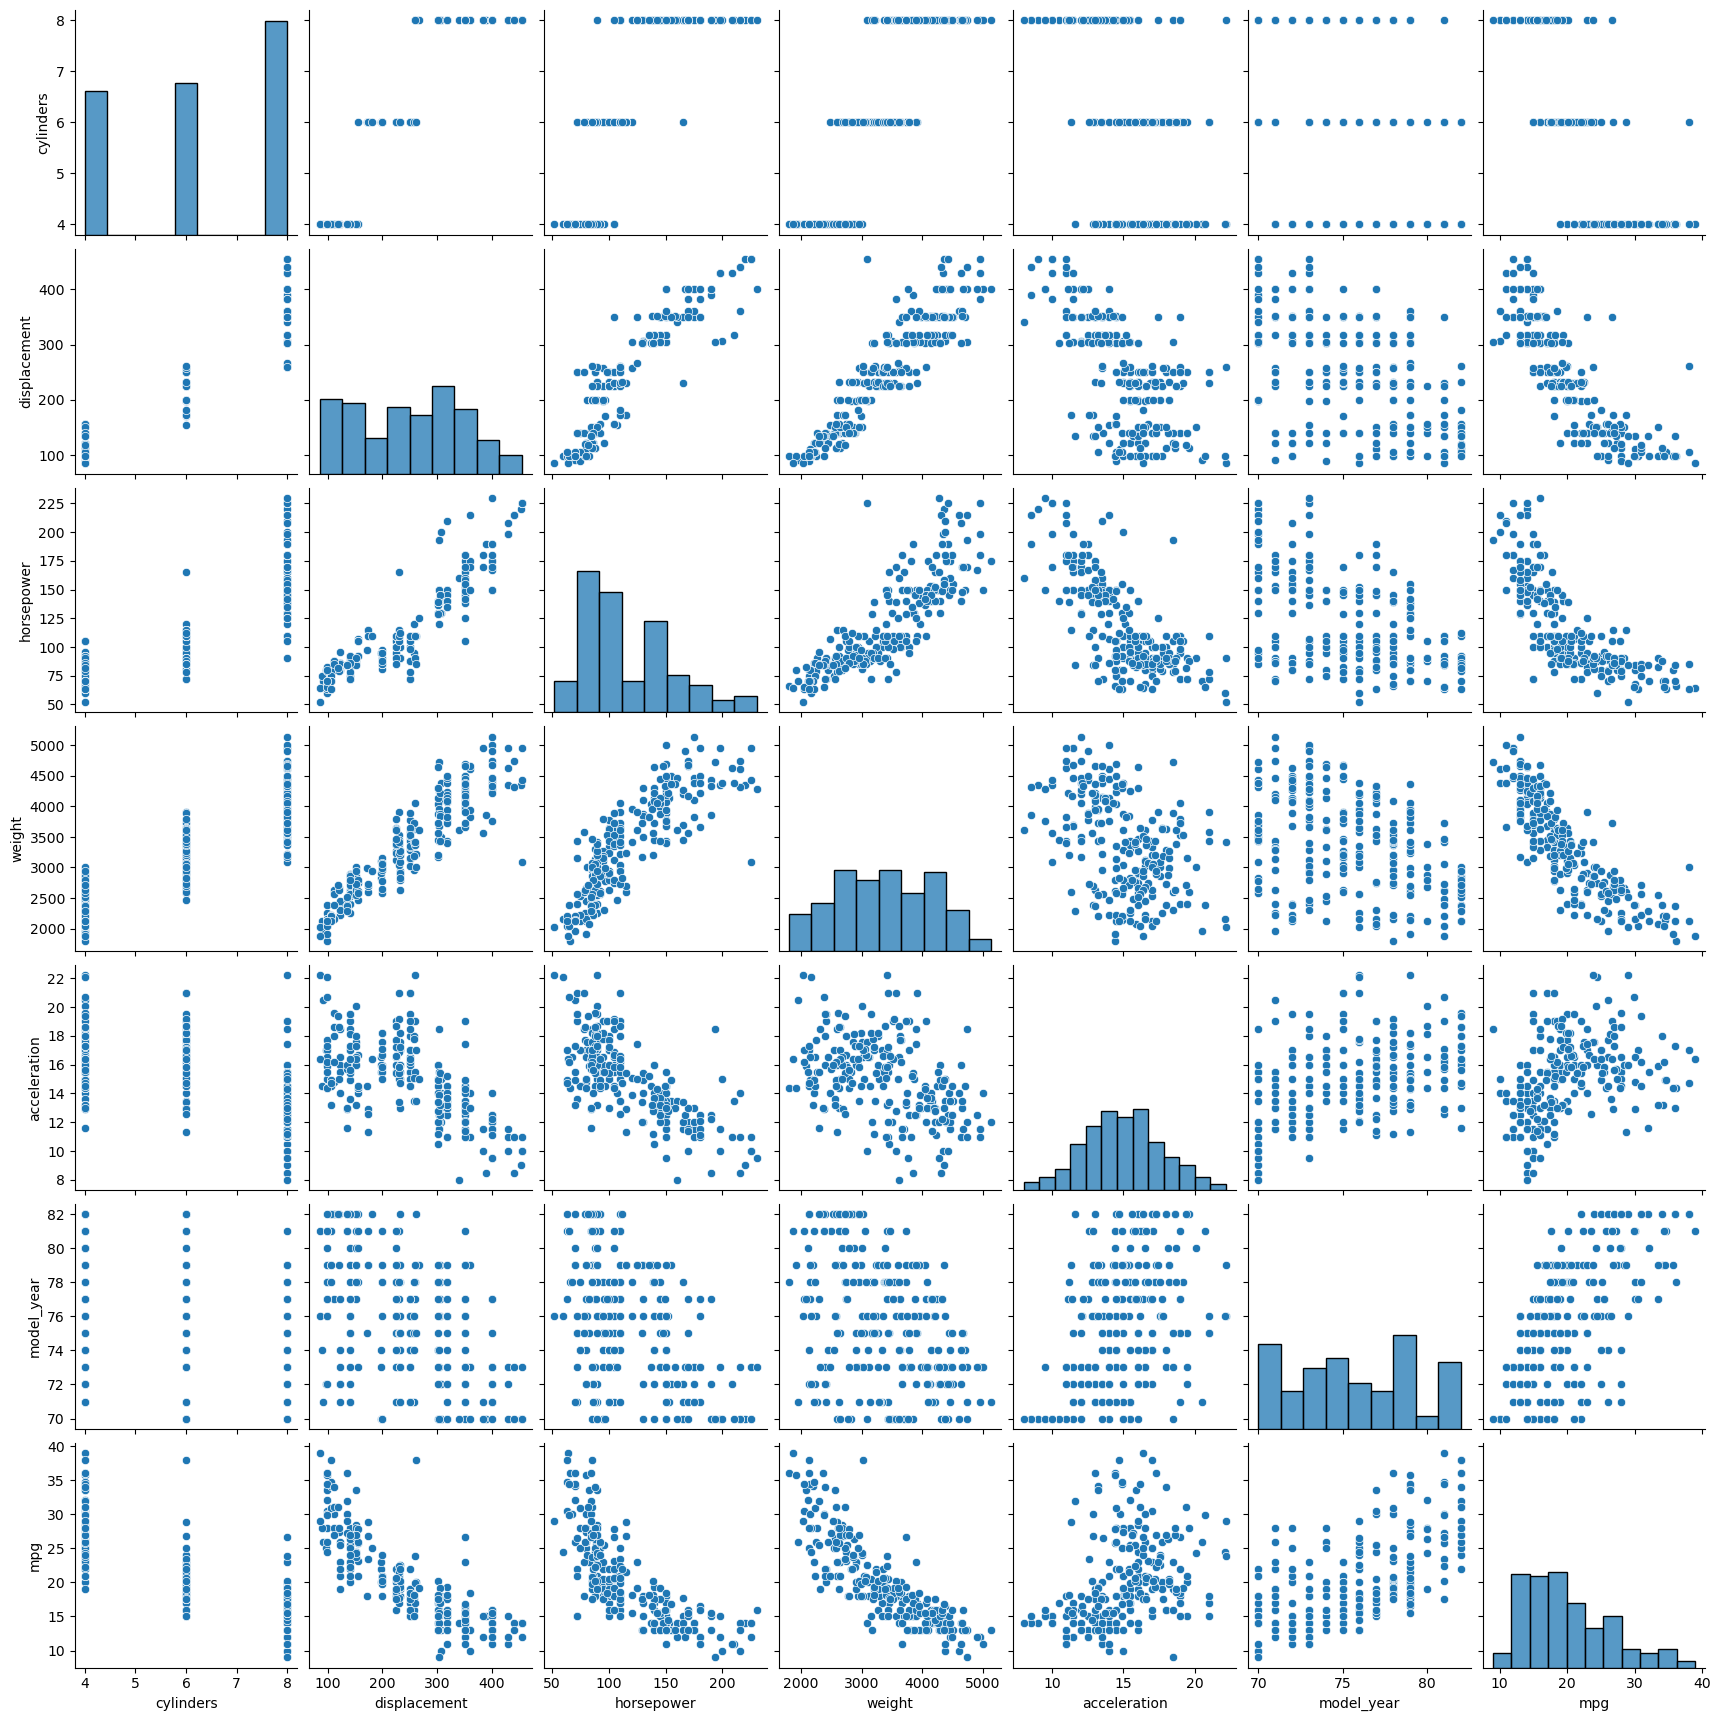

In [90]:
sns.pairplot(df_USA)

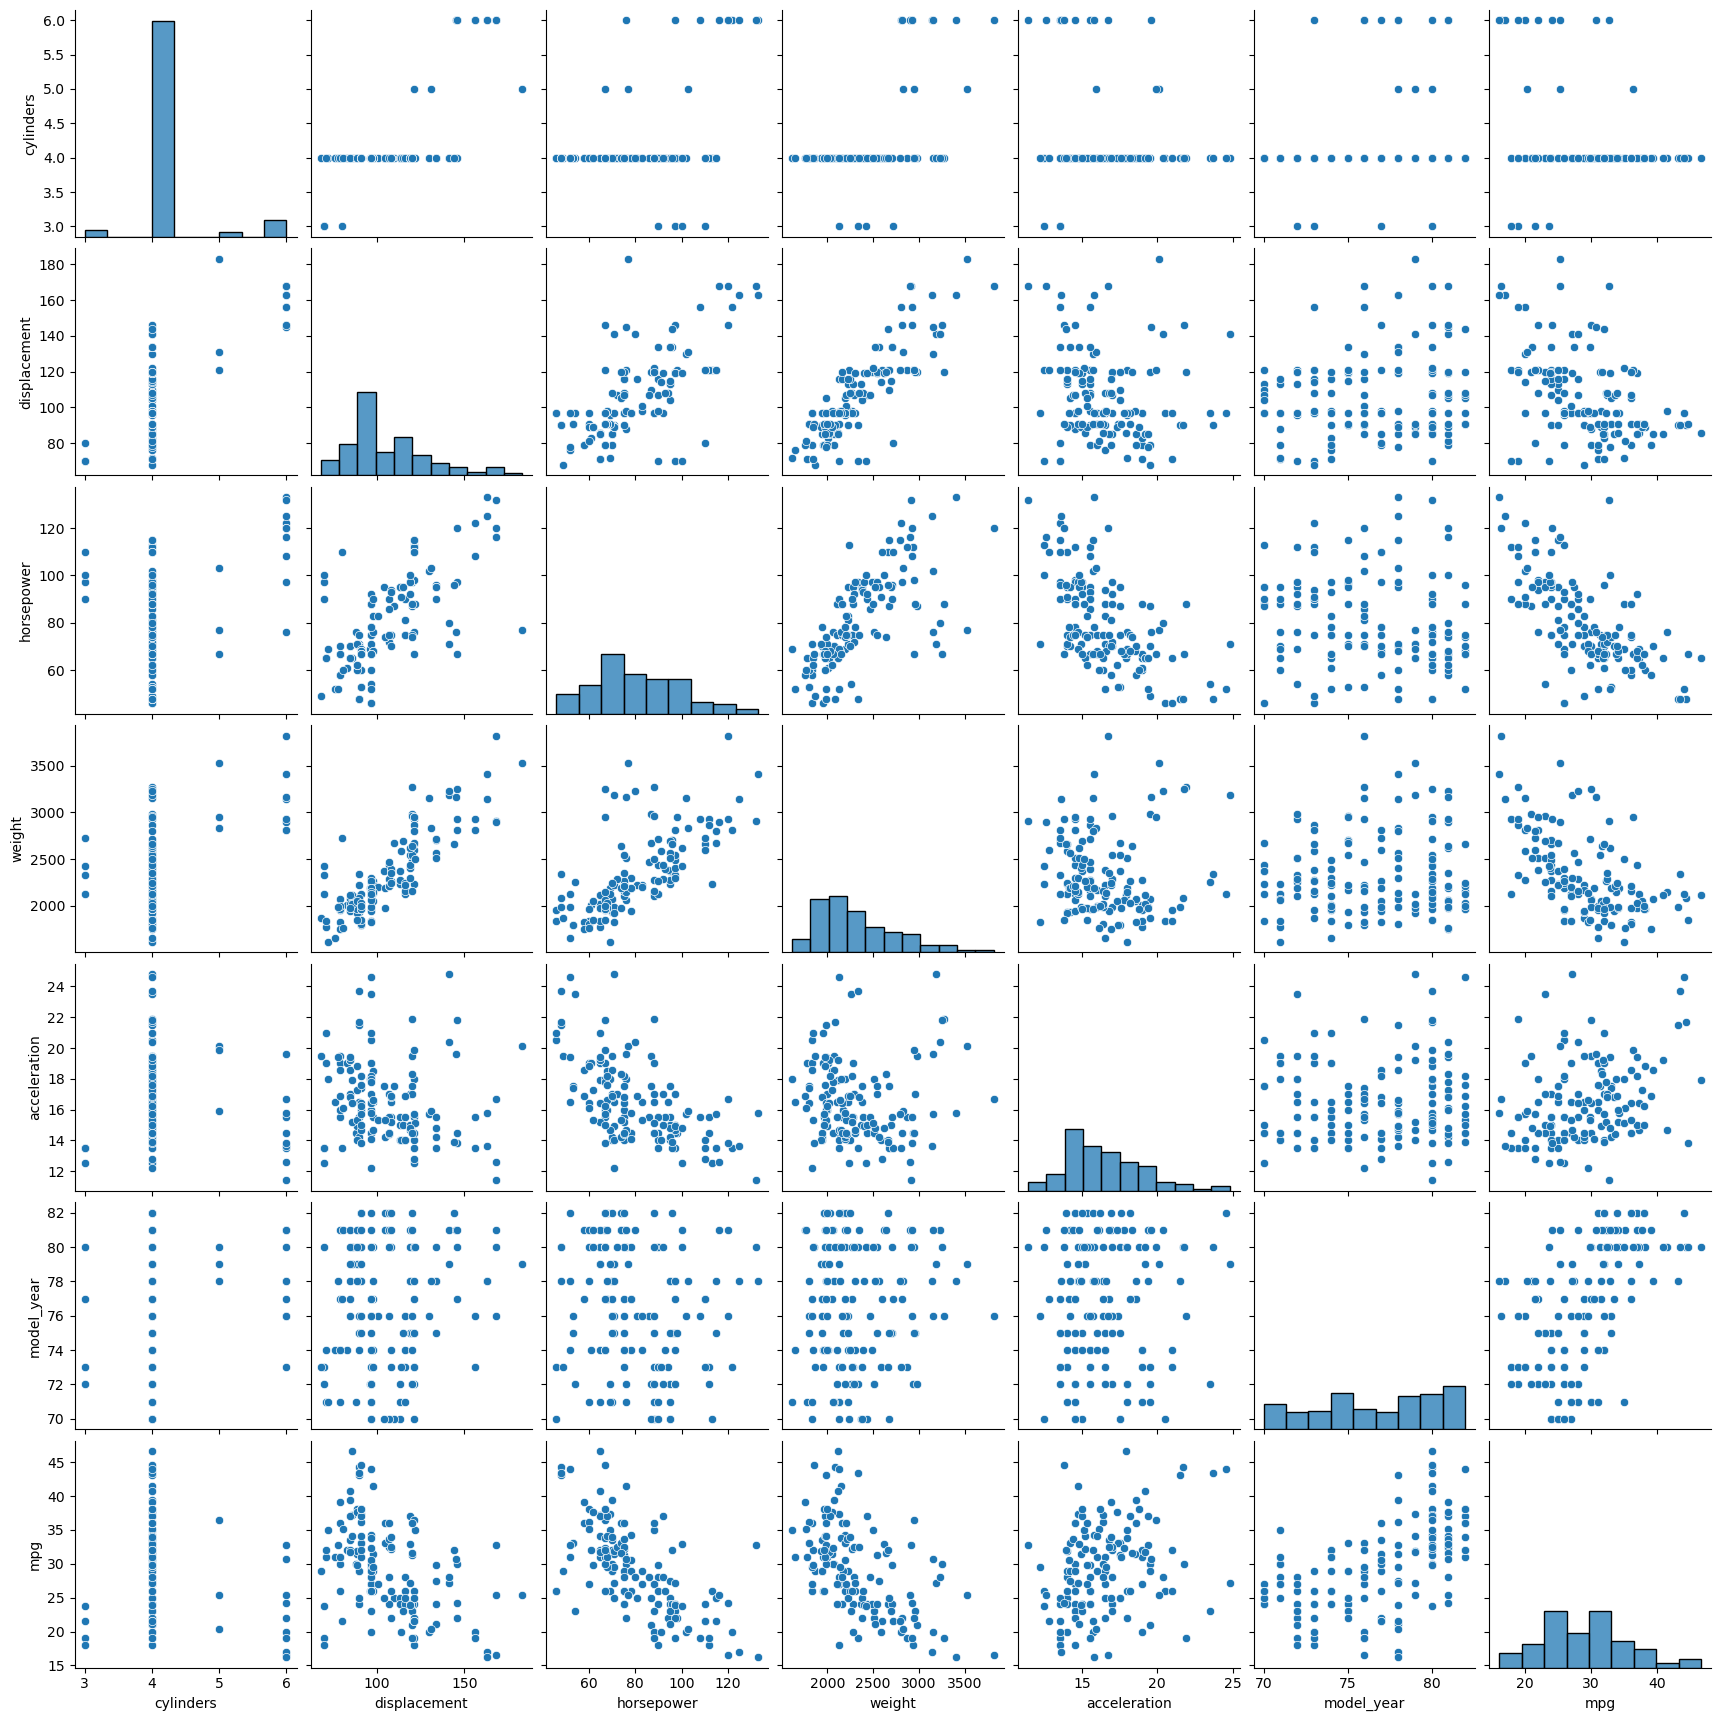

In [91]:
sns.pairplot(df_EUA)

In [8]:
torch.tensor(df[["weight", "mpg"]].values)

tensor([[3504.0000,   18.0000],
        [3693.0000,   15.0000],
        [3436.0000,   18.0000],
        [3433.0000,   16.0000],
        [3449.0000,   17.0000],
        [4341.0000,   15.0000],
        [4354.0000,   14.0000],
        [4312.0000,   14.0000],
        [4425.0000,   14.0000],
        [3850.0000,   15.0000],
        [3563.0000,   15.0000],
        [3609.0000,   14.0000],
        [3761.0000,   15.0000],
        [3086.0000,   14.0000],
        [2372.0000,   24.0000],
        [2833.0000,   22.0000],
        [2774.0000,   18.0000],
        [2587.0000,   21.0000],
        [2130.0000,   27.0000],
        [1835.0000,   26.0000],
        [2672.0000,   25.0000],
        [2430.0000,   24.0000],
        [2375.0000,   25.0000],
        [2234.0000,   26.0000],
        [2648.0000,   21.0000],
        [4615.0000,   10.0000],
        [4376.0000,   10.0000],
        [4382.0000,   11.0000],
        [4732.0000,    9.0000],
        [2130.0000,   27.0000],
        [2264.0000,   28.0000],
        

In [9]:
mpg = torch.tensor(df["mpg"])
weight = torch.tensor(df["weight"])
mpg.dtype

torch.float64

In [10]:
alpha = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
lr = 1e-7
optimizer = torch.optim.SGD(params=[alpha], lr=lr)
n = 1000
for i in range(n):
    mean_squared_error = ((alpha * weight - mpg) ** 2).mean()
    mean_squared_error.backward()
    optimizer.step()
    if i % 100 == 0:
        print(alpha.item())
    optimizer.zero_grad()

alpha = alpha.detach()
mean_relative_error =  ((alpha * weight - mpg).abs() / mpg).mean().item()
print(f"erreur relative moyenne: {100 * mean_relative_error:.2f} %")


0.012861766020408161
0.0067099405219947375
0.006708863782529718
0.006708863594070555
0.0067088635940375715
0.0067088635940375655
0.0067088635940375655
0.0067088635940375655
0.0067088635940375655
0.0067088635940375655
erreur relative moyenne: 52.09 %


In [11]:
df_lin = pd.DataFrame()
df_lin["weight"] = weight
df_lin["mpg (pred)"] = alpha * weight
df_lin["mpg"] = mpg
df_lin

,weight,mpg (pred),mpg
0,3504,23.507858,18.0
1,3693,24.775833,15.0
2,3436,23.051655,18.0
3,3433,23.031529,16.0
4,3449,23.138871,17.0
...,...,...,...
387,2790,18.717729,27.0
388,2130,14.289879,44.0
389,2295,15.396842,32.0
390,2625,17.610767,28.0


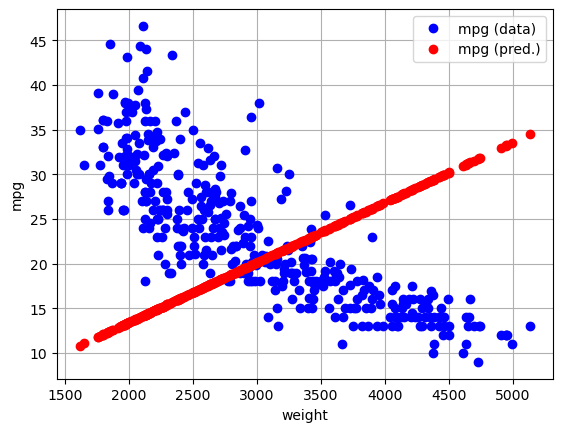

In [12]:
import matplotlib.pyplot as plt
plt.plot(weight, mpg, "bo", label="mpg (data)")
plt.plot(weight, alpha * weight, "ro", label="mpg (pred.)")
plt.grid(True)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend()

In [14]:
alpha = torch.tensor(-0.01, requires_grad=True, dtype=torch.float64)
beta = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
lr = 1e-7
optimizer = torch.optim.SGD(params=[alpha, beta], lr=lr)
n = 100_000
for i in range(n):
    mean_squared_error = ((alpha * weight + beta - mpg) ** 2).mean()
    mean_squared_error.backward()
    optimizer.step()
    if i % 10_000 == 0:
        print(alpha.item(), beta.item())
    optimizer.zero_grad()

alpha = alpha.detach()
beta = beta.detach()
mean_relative_error =  ((alpha * weight + beta - mpg).abs() / mpg).mean().item()
print(f"erreur relative moyenne: {100 * mean_relative_error:.2f} %")


0.02203306953571428 1.0644352040816327e-05
0.006706706452454749 0.0069447862298552395
0.006704551349853406 0.013882646455595017
0.006702396570817018 0.020819465037918802
0.006700242115297005 0.027755242133218155
0.0066980879832447965 0.0346899778978604
0.006695934174611825 0.041623672488190454
0.006693780689349536 0.048556326060528884
0.006691627527409374 0.05548793877117342
0.0066894746887428 0.0624185107763974
erreur relative moyenne: 52.02 %


In [19]:
M = torch.stack((weight, torch.ones_like(weight))).to(torch.float64)
A = M @ M.T
A

tensor([[3.7576e+09, 1.1672e+06],
        [1.1672e+06, 3.9200e+02]], dtype=torch.float64)

In [21]:
torch.linalg.cond(A)

tensor(1.2768e+08, dtype=torch.float64)

In [27]:
grad = torch.tensor([1.0, -0.9, 1.1, -1.2, 0.99, -0.8, 1.0, -1.0, 0.9, -1.1])

In [28]:
grad_sum = 0.0
print(grad_sum)
for i, g in enumerate(grad):
    grad_sum = grad_sum + g
    print("gradient:", g, "gradient lissé & amplifié:", grad_sum)

0.0
gradient: tensor(1.) gradient boosté: tensor(1.)
gradient: tensor(-0.9000) gradient boosté: tensor(0.1000)
gradient: tensor(1.1000) gradient boosté: tensor(1.2000)
gradient: tensor(-1.2000) gradient boosté: tensor(0.)
gradient: tensor(0.9900) gradient boosté: tensor(0.9900)
gradient: tensor(-0.8000) gradient boosté: tensor(0.1900)
gradient: tensor(1.) gradient boosté: tensor(1.1900)
gradient: tensor(-1.) gradient boosté: tensor(0.1900)
gradient: tensor(0.9000) gradient boosté: tensor(1.0900)
gradient: tensor(-1.1000) gradient boosté: tensor(-0.0100)


In [31]:
alpha = torch.tensor(-0.01, requires_grad=True, dtype=torch.float64)
beta = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
lr = 1e-7
momentum = 0.999
optimizer = torch.optim.SGD(params=[alpha, beta], lr=lr, momentum=momentum)
n = 1_000_000
for i in range(n):
    mean_squared_error = ((alpha * weight + beta - mpg) ** 2).mean()
    mean_squared_error.backward()
    optimizer.step()
    if i % 10_000 == 0:
        print(alpha.item(), beta.item())
    optimizer.zero_grad()

alpha = alpha.detach()
beta = beta.detach()
mean_relative_error =  ((alpha * weight + beta - mpg).abs() / mpg).mean().item()
print(f"erreur relative moyenne: {100 * mean_relative_error:.2f} %")

0.02203306953571428 1.0644352040816327e-05
0.004792641261805349 5.913111775930276
0.003100588446502157 11.612736600986457
0.0015815040618697835 16.50636044893575
0.00027637283197283106 20.7079342138702
-0.0008441889933502435 24.315326740265633
-0.0018062823480589644 27.412566386062156
-0.0026323176793156635 30.071798325281947
-0.0033415361405948448 32.35496505284324
-0.003950457825643496 34.315249234513104
-0.004473266577482521 35.9983125108464
-0.004922140378023251 37.44335911104363
-0.00530753501440441 38.684049051882134
-0.005638427629594612 39.74928219321265
-0.005922525830377882 40.66387141332203
-0.0061664472235524095 41.44912058468734
-0.0063758735623470515 42.12332081313088
-0.006555683093647704 42.70217649946436
-0.006710064188846421 43.1991711480334
-0.006842612905159457 43.6258814430828
-0.006956416749947653 43.99224690883822
-0.007054126599192827 44.30680143460341
-0.007138018445353882 44.576872057868385
-0.007210046412919821 44.80874963576435
-0.0072718882765704885 45.0078

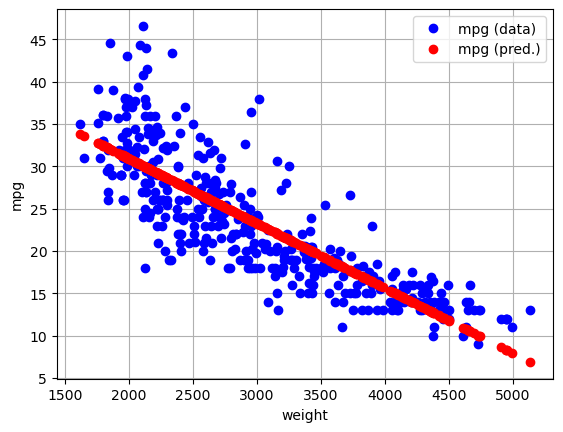

In [32]:
import matplotlib.pyplot as plt
plt.plot(weight, mpg, "bo", label="mpg (data)")
plt.plot(weight, alpha * weight + beta, "ro", label="mpg (pred.)")
plt.grid(True)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend()

In [45]:
normalized_weight = weight / 3000.0

In [46]:
normalized_weight.mean()

tensor(0.9925)

In [47]:
M = torch.stack((normalized_weight, torch.ones_like(weight)))
A = M @ M.T / len(weight)
torch.linalg.cond(A)

tensor(51.3135)

In [48]:
torch.linalg.eigh(A)

torch.return_types.linalg_eigh(
eigenvalues=tensor([0.0395, 2.0256]),
eigenvectors=tensor([[ 0.6954, -0.7186],
        [-0.7186, -0.6954]]))

In [64]:
weight_beyond_3000_normalized = torch.max(normalized_weight - 1.0, torch.zeros_like(normalized_weight))

In [71]:
alpha_normalized = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
gamma_normalized = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
beta = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
lr = 0.1
optimizer = torch.optim.SGD(params=[alpha_normalized, gamma_normalized, beta], lr=lr)
n = 100_000
for i in range(n):
    mean_squared_error = (
        (alpha_normalized * normalized_weight + 
         gamma_normalized * weight_beyond_3000_normalized +
         beta 
         - mpg) ** 2).mean()
    mean_squared_error.backward()
    optimizer.step()
    if i % 10_000 == 0:
        print(alpha_normalized.item()/3000.0, gamma_normalized.item()/3000.0, beta.item())
    optimizer.zero_grad()

alpha = alpha_normalized.detach() / 3000.0
gamma = gamma_normalized.detach() / 3000.0
weight_beyond_3000 = weight_beyond_3000_normalized * 3000.0
beta = beta.detach()
mean_relative_error =  ((alpha * weight + gamma * weight_beyond_3000 + beta - mpg).abs() / mpg).mean().item()
print(f"erreur relative moyenne: {100 * mean_relative_error:.2f} %")


0.0014290851593017578 0.00011763943036397299 4.689183807373047
-0.01073724817602575 0.005340489720801502 53.53921987176828
-0.010754263490748718 0.005367853331007031 53.58039024970458
-0.010754299802143583 0.005367911971980343 53.58047838094395
-0.01075430034255927 0.005367912611178982 53.58048041366002
-0.01075430102031422 0.005367912596279109 53.58048009869904
-0.010754300874655655 0.005367912619439194 53.58048064400068
-0.010754300861493234 0.005367912623662381 53.58048067884441
-0.01075430088508701 0.005367912617703106 53.58048061757565
-0.010754300890302687 0.005367912616835062 53.58048060436314
erreur relative moyenne: 13.06 %


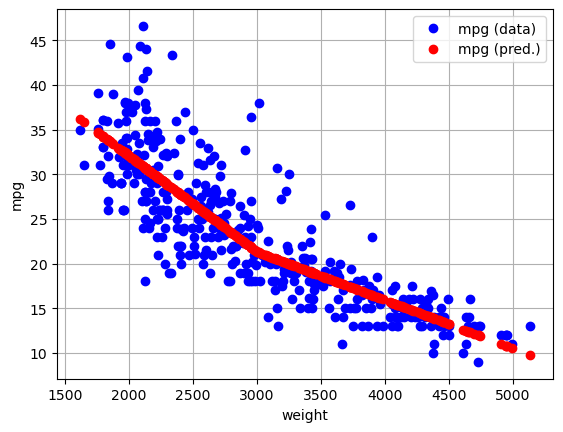

In [69]:
import matplotlib.pyplot as plt
plt.plot(weight, mpg, "bo", label="mpg (data)")
plt.plot(weight, alpha * weight + gamma * weight_beyond_3000 + beta, "ro", label="mpg (pred.)")
plt.grid(True)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend()

In [72]:
lr = 0.1
optimizer = torch.optim.SGD(params=[alpha_normalized], lr=lr)
n = 1000
for i in range(n):
    mean_squared_error = (
        (alpha_normalized / normalized_weight - mpg) ** 2).mean()
    mean_squared_error.backward()
    optimizer.step()
    if i % 100 == 0:
        print(alpha_normalized.item() * 3000.0)
    optimizer.zero_grad()

alpha = alpha_normalized.detach() * 3000.0
mean_relative_error =  ((alpha / weight - mpg).abs() / mpg).mean().item()
print(f"erreur relative moyenne: {100 * mean_relative_error:.2f} %")


-55586.85656244726
64651.40175345537
64651.40125165922
64651.40226782573
64651.40176602958
64651.40126423343
64651.40228039994
64651.40177860379
64651.401276807635
64651.40229297415
erreur relative moyenne: 13.18 %


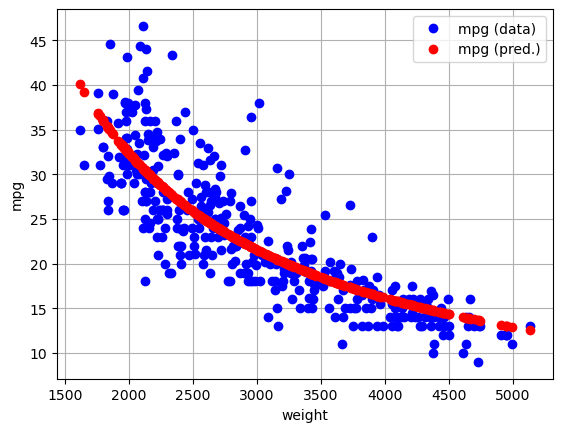

In [73]:
import matplotlib.pyplot as plt
plt.plot(weight, mpg, "bo", label="mpg (data)")
plt.plot(weight, alpha / weight, "ro", label="mpg (pred.)")
plt.grid(True)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend()

In [76]:
year = torch.tensor(df["model_year"]).to(torch.float64)
year_normalized = (year - year.mean()) / year.std()
year_normalized

tensor([-1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232,
        -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232,
        -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.6232,
        -1.6232, -1.6232, -1.6232, -1.6232, -1.6232, -1.3518, -1.3518, -1.3518,
        -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518,
        -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518,
        -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518, -1.3518,
        -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803,
        -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803,
        -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803, -1.0803,
        -1.0803, -1.0803, -1.0803, -1.0803, -0.8089, -0.8089, -0.8089, -0.8089,
        -0.8089, -0.8089, -0.8089, -0.8089, -0.8089, -0.8089, -0.8089, -0.8089,
        -0.8089, -0.8089, -0.8089, -0.80

In [82]:
alpha = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
beta = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
gamma = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)

lr = 0.1
optimizer = torch.optim.SGD(params=[alpha, beta, gamma], lr=lr)
n = 10_000
for i in range(n):
    mean_squared_error = (
        (alpha / normalized_weight + beta * year_normalized + gamma - mpg) ** 2).mean()
    mean_squared_error.backward()
    optimizer.step()
    if i % 100 == 0:
        print(alpha.item(), beta.item(), gamma.item())
    optimizer.zero_grad()

alpha = alpha.detach()
beta = beta.detach()
gamma = gamma.detach()
mean_relative_error =  ((alpha / normalized_weight + beta * year_normalized + gamma - mpg).abs() / mpg).mean().item()
print(f"erreur relative moyenne: {100 * mean_relative_error:.2f} %")
import matplotlib.pyplot as plt
plt.plot(weight, mpg, "bo", label="mpg (data)")
plt.plot(weight, alpha / weight, "ro", label="mpg (pred.)")
plt.grid(True)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend()

5.49999122619629 0.9039135180411576 4.689183673469388
15.95040412545204 3.300362815696989 6.208318171100029
17.7274471566081 3.156787130030763 4.197694454508922
18.57320950664579 3.0884539174404475 3.2407610949322536
18.97574043758212 3.055931555596894 2.7853199327181937
19.167320956662273 3.0404529461981094 2.5685585453867605
19.25850120000539 3.0330860564699305 2.4653932393359668
19.301896843686674 3.0295798366115836 2.4162924518770166
19.322551321051996 3.027911149997514 2.3929241812107414
19.332380927540342 3.027116906962977 2.3818017839789123
19.337059184722587 3.0267389078766773 2.376508186604426
19.33928566649555 3.026558988075936 2.3739886604840663
19.34034606814383 3.026473390303326 2.3727901174579653
19.340850314684197 3.026432660963158 2.3722193275635757
19.34109030980615 3.026413250810607 2.3719476171229448
19.341204420290854 3.026404007437945 2.3718183206368875
19.341258573718346 3.026399594965211 2.371756688634596
19.341284598223833 3.0263975546316755 2.371727533789203
19

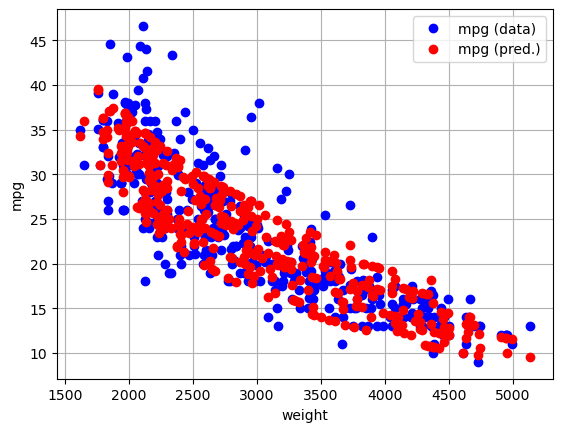

In [85]:
import matplotlib.pyplot as plt
plt.plot(weight, mpg, "bo", label="mpg (data)")
plt.plot(weight, alpha / normalized_weight + beta * year_normalized + gamma, "ro", label="mpg (pred.)")
plt.grid(True)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.legend()